In [1]:
pip install vaderSentiment-fr

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from vaderSentiment_fr.vaderSentiment import SentimentIntensityAnalyzer
import re
import matplotlib.pyplot as plt
import datetime
import time
from matplotlib.dates import WeekdayLocator

/Users/mengxiangyong/opt/anaconda3/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
df = pd.read_csv("Articles_Lemonde.csv")
df['Article_Title']

0        Ligue des champions : le FC Barcelone s’impose...
1        A Metz, Marine Le Pen accuse l’UE d’un « Tcher...
2        Foot féminin, golf et le dessinateur Siro, dan...
3        1er-Mai à Paris : les images d’une manifestati...
4        Quatre questions sur l’opération « Liberté » d...
                               ...                        
28625    Réforme de l’assurance-chômage : une nouvelle ...
28626    « Hamnet », de Maggie O’Farrell : le feuilleto...
28627    Le président LRM de la région Guadeloupe mis e...
28628    « Nous sommes à la fois capables du meilleur c...
28629    Des bureaux de légende : la France des « trent...
Name: Article_Title, Length: 28630, dtype: object

# neg = negative、neu = neutral、pos = positive、compound

In [4]:
SIA = SentimentIntensityAnalyzer()
for i in df['Article_Title']:
    vs = SIA.polarity_scores(i)
    print("{:-<65} {}".format(i, str(vs)))

Ligue des champions : le FC Barcelone s’impose face à Liverpool-- {'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.2942}
A Metz, Marine Le Pen accuse l’UE d’un « Tchernobyl économique, social et identitaire » {'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'compound': -0.3595}
Foot féminin, golf et le dessinateur Siro, dans "Esprit sport et olympisme" {'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'compound': 0.1779}
1er-Mai à Paris : les images d’une manifestation inhabituelle---- {'neg': 0.223, 'neu': 0.777, 'pos': 0.0, 'compound': -0.3182}
Quatre questions sur l’opération « Liberté » de Juan Guaido au Venezuela {'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'compound': 0.3818}
« J’ai bu pendant sept heures sur une scène de théâtre »--------- {'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'compound': 0.1027}
Après des fuites dans la presse sur Huawei, Theresa May limoge son ministre de la défense {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.2023}
"Le Cagou" éligible au régime fiscal du mécénat.

Au Paraguay et à Java, « vert de rage » et d’espoir-------------- {'neg': 0.214, 'neu': 0.786, 'pos': 0.0, 'compound': -0.4588}
Rugby : le Stade français envisage de renommer son terrain historique de Jean-Bouin pour un contrat de « naming » {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
« Un amour inhumain », les histoires extraordinaires d’Edogawa Ranpo {'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.8481}
Roland-Garros, « Charlie Hebdo » et l’ancienne chronique pour défendre l’hôpital public {'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.3818}
De par le monde, ces Français dans le couloir de la mort--------- {'neg': 0.147, 'neu': 0.853, 'pos': 0.0, 'compound': -0.2263}
Roland-Garros 2019 : tous les matchs de mercredi reportés à cause de la pluie {'neg': 0.122, 'neu': 0.878, 'pos': 0.0, 'compound': -0.2714}
Crédit immobilier : on peut désormais emprunter sur 20 ans à… 0,95 % {'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'compound': 0.2462}
Des pistes pour lutter cont

Le chanteur brésilien Joao Gilberto, inventeur de la bossa-nova, est mort à 88 ans {'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'compound': -0.2942}
Féminicides : après la mobilisation à Paris, Marlène Schiappa promet un « Grenelle des violences conjugales » {'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound': 0.3818}
Euro basket 2019 : les Bleues de retour en finale, la force de l’habitude {'neg': 0.122, 'neu': 0.878, 'pos': 0.0, 'compound': -0.2714}
Italie : un navire débarque une quarantaine de migrants à Lampedusa, défiant Matteo Salvini {'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'compound': -0.2263}
Algérie : le « Forum du dialogue national » travaille sur une sortie de crise {'neg': 0.222, 'neu': 0.703, 'pos': 0.076, 'compound': -0.5719}
Tour de France : c’est tombé sur Jakob Fuglsang------------------ {'neg': 0.229, 'neu': 0.642, 'pos': 0.128, 'compound': -0.2732}
Une explosion dans un centre commercial fait une vingtaine de blessés en Floride {'neg': 0.205, 'neu': 0.795, 'pos': 0.0, 'c

Photos d’accidents de la route et liens douteux : attention au « phishing » sur Facebook {'neg': 0.126, 'neu': 0.653, 'pos': 0.221, 'compound': 0.2263}
Apple délivre ses premières cartes de crédit aux Etats-Unis------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Mozambique : signature d’un accord de paix définitif entre le pouvoir et la Renamo {'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'compound': 0.6486}
Algérie : le général Khaled Nezzar visé par un mandat d’arrêt international {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Ligue 1 : Laurent Koscielny quitte Arsenal et signe à Bordeaux--- {'neg': 0.16, 'neu': 0.84, 'pos': 0.0, 'compound': -0.2942}
« Un homme intègre » : en Iran, la morale à l’épreuve------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Environ 24 000 enfants vénézuéliens bientôt naturalisés colombiens {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
« The Vietnam War » : un voyage au bout de l’enfer vietnamien---- {'neg': 0.0, 'neu': 1

L’ancien commissaire-priseur Guy Loudmer est mort---------------- {'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'compound': -0.2263}
Peter Lindbergh : « Mon grand sujet était les femmes, les suivre au plus près afin qu’elles s’expriment, affirment leur vérité » {'neg': 0.0, 'neu': 0.901, 'pos': 0.099, 'compound': 0.3182}
Gérard Larcher s’installe en opposant de droite à Emmanuel Macron {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
#plasticsurgery ou des opérations pas vraiment esthétiques------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Collecte des impôts : le gouvernement chamboule tout------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
« Il y a un vrai risque que cela ouvre une jurisprudence Villani » : LRM craint d’autres dissidences {'neg': 0.217, 'neu': 0.783, 'pos': 0.0, 'compound': -0.6114}
Google paye une amende record pour ne pas avoir protégé les données d’enfants sur YouTube {'neg': 0.143, 'neu': 0.774, 'pos': 0.083, 'compound': -0.2514}
Tenni

Après l’incendie à Rouen, plusieurs enseignants exercent leur droit de retrait dans trois collèges {'neg': 0.0, 'neu': 0.922, 'pos': 0.078, 'compound': 0.0258}
Télévision : « On a voulu voir… », une ode aux villes mal-aimées et à leurs habitants {'neg': 0.075, 'neu': 0.925, 'pos': 0.0, 'compound': -0.0772}
« La décentralisation n’est pas complètement acceptée au niveau de l’Etat » {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
« Au Guatemala, la lutte contre la corruption laisse un socle de justice et de conscience citoyenne qu’aucune mafia ne pourra détruire » {'neg': 0.201, 'neu': 0.683, 'pos': 0.116, 'compound': -0.3612}
La mort de la philosophe Monique Castillo------------------------ {'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'compound': -0.2263}
Sénégal : Khalifa Sall libéré, son camp vise la reconquête de ses droits politiques {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4019}
Après la faillite de Thomas Cook, deux tiers des vacanciers britanniques concernés déjà 

« Nous sommes tous des rescapés » : le docteur Aggoune, témoin à vif de l’Algérie {'neg': 0.0, 'neu': 0.926, 'pos': 0.074, 'compound': 0.0516}
Une diva égyptienne, un parfum mythique, des sculptures sensuelles... Les 7 idées de la semaine {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': -0.0271}
Vers une filière pollueur-payeur pour les déchets de chantier---- {'neg': 0.238, 'neu': 0.762, 'pos': 0.0, 'compound': -0.3612}
Philippe Madec : « Il faut se désintoxiquer de la technique et de la monoculture du béton » {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Le bâtiment à l’épreuve du bilan carbone------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Tennis : même affaibli, Novak Djokovic reste le roi de Bercy----- {'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'compound': -0.4215}
Hongkong : violente bagarre au couteau lors d’une nouvelle journée de manifestations {'neg': 0.483, 'neu': 0.517, 'pos': 0.0, 'compound': -0.8126}
Les Européens de G2 Esports se qua

Algérie : « Nous sommes des zombies qui envahissons les rues pour manger du corrompu » {'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'compound': -0.25}
Deux pesticides « tueurs d’abeilles » interdits en France-------- {'neg': 0.504, 'neu': 0.496, 'pos': 0.0, 'compound': -0.7964}
Balkans dorés au Monténégro-------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Fraude aux subventions européennes : réouverture de l’enquête visant le premier ministre tchèque {'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'compound': -0.5859}
Le dilemme des précaires qui veulent faire grève----------------- {'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'compound': -0.34}
L’Afrique de l’Est touchée par des pluies torrentielles---------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Biathlon : victoire de Martin Fourcade et quadruplé français historique à Östersund {'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'compound': 0.5859}
Manifestation du 5 décembre : à Paris, un défilé déjà s

Volley : battue par la Bulgarie, la France reste en course pour les JO {'neg': 0.15, 'neu': 0.85, 'pos': 0.0, 'compound': -0.3802}
De nouveaux documents éclairent l’activité « business » de Cambridge Analytica {'neg': 0.107, 'neu': 0.893, 'pos': 0.0, 'compound': -0.0516}
Harvey Weinstein mis en examen dans deux nouveaux cas d’agression sexuelle {'neg': 0.107, 'neu': 0.893, 'pos': 0.0, 'compound': -0.0516}
Israël approuve la construction de plus de 1 900 logements en Cisjordanie, d’après une ONG {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.4753}
Sur les réseaux sociaux américains, une ambiance de « troisième guerre mondiale » {'neg': 0.239, 'neu': 0.675, 'pos': 0.086, 'compound': -0.5423}
En Libye, les forces du maréchal Haftar annoncent avoir pris le contrôle de Syrte {'neg': 0.122, 'neu': 0.878, 'pos': 0.0, 'compound': -0.2023}
En Ethiopie, le Noël orthodoxe assombri par la flambée des prix-- {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.5106}
Les plaintes de famill

Bataille aux Nations unies autour du plan de Trump pour le Proche-Orient {'neg': 0.169, 'neu': 0.649, 'pos': 0.182, 'compound': 0.0516}
Transports gratuits : « L’essentiel, c’est l’offre, pas le prix » {'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'compound': -0.4023}
« Green Book » : entre Tony et Don, une amitié hors norme-------- {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.4404}
« Nous avons quelques semaines pour contrôler l’invasion de criquets pèlerins » dans la Corne de l’Afrique {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Oscars 2020 : le vieil Hollywood fera-t-il un triomphe à « 1917 » ? {'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.3786}
A Chamonix, Pinturault et Kristoffersen à la lutte pour régner sur le ski mondial {'neg': 0.152, 'neu': 0.759, 'pos': 0.089, 'compound': -0.25}
Les accidents de vélo à Paris ont augmenté de 150 % en janvier lors de la grève des transports {'neg': 0.181, 'neu': 0.724, 'pos': 0.095, 'compound': -0.2263}
Le parquet antit

Coronavirus en Iran : « Comme lors du crash de l’avion, ils ont caché la vérité » {'neg': 0.201, 'neu': 0.686, 'pos': 0.113, 'compound': -0.2023}
L’inquiétude des candidats à l’ENA privés d’ENA------------------ {'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'compound': -0.5696}
Ces jeunes femmes têtes de listes envoyées à la conquête des bastions de droite parisiens {'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'compound': 0.25}
Premier cas de Covid-19 en Côte d’Ivoire------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Doutes sur la fusion de Fincantieri et des Chantiers de l’Atlantique {'neg': 0.168, 'neu': 0.72, 'pos': 0.112, 'compound': -0.1779}
Escroquerie au « faux Le Drian » : Gilbert Chikli condamné à onze ans de prison {'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.8225}
Coronavirus : à Paris, un nombre de cas largement sous-estimé---- {'neg': 0.162, 'neu': 0.615, 'pos': 0.223, 'compound': 0.2023}
Morts sous X : derrière les milliers de sépultures ano

Coronavirus : Emmanuel Macron en première ligne devant l’opinion- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Alexandre Mattiussi, l’AMI du prêt-à-porter---------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Coronavirus : les saisonniers roumains préparent enfin leur départ pour les champs allemands {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Jean-Denis Combrexelle : « Les juges administratifs du Conseil d’Etat se situent loin des polémiques » {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
« Le Conseil d’Etat se dévitalise alors qu’il devrait être l’ultime bastion des libertés » {'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.2732}
F1 : mort de Stirling Moss, le « champion sans couronne »-------- {'neg': 0.12, 'neu': 0.633, 'pos': 0.247, 'compound': 0.5093}
En Italie, « le moment où les hôpitaux ont été débordés a été terrible » {'neg': 0.097, 'neu': 0.903, 'pos': 0.0, 'compound': -0.128}
A l’instar du coronavirus, « la pollution,

Velibor Colic, Jean-Baptiste Harang, Gustavo Rodriguez, Sumana Roy : les brèves critiques du « Monde des livres » {'neg': 0.141, 'neu': 0.859, 'pos': 0.0, 'compound': -0.4215}
« Journal », de Jean-René Huguenin : le feuilleton littéraire de Camille Laurens {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Covid-19 : l’essor de l’apprentissage  est menacé de subir un coup d’arrêt {'neg': 0.13, 'neu': 0.87, 'pos': 0.0, 'compound': -0.2023}
Avec Freud ou les Kinks, à Los Angeles ou en forêt : quatre documentaires à rattraper ce week-end {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Un apéro virtuel avec Les Goguettes : « On se retrouve dans la tradition du bouffon du roi » {'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'compound': 0.128}
Pesticides : pour le Conseil d’Etat, les épandages peuvent se poursuivre près des habitations malgré le Covid-19 {'neg': 0.144, 'neu': 0.798, 'pos': 0.059, 'compound': -0.3818}
Amazon travaille à une réouverture progressive de ses entrepôts en Franc

Archéologie : l’Inrap dans une situation délicate après le confinement {'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'compound': -0.0772}
Au Sénégal, la pandémie causée par le coronavirus a entraîné un manque de sang fatal à l’hôpital {'neg': 0.242, 'neu': 0.758, 'pos': 0.0, 'compound': -0.5859}
Veronica, Emmeline, Norma, Jonathan, Sandie, Mathilda… six histoires qui racontent la pandémie aux Etats-Unis {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
L’arc-en-ciel à la fête------------------------------------------ {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.34}
La mort de Jean Raspail------------------------------------------ {'neg': 0.322, 'neu': 0.678, 'pos': 0.0, 'compound': -0.2263}
Dijon : après quatre nuits de troubles et d’expéditions punitives, l’Etat promet « une réponse extrêmement ferme » {'neg': 0.264, 'neu': 0.628, 'pos': 0.109, 'compound': -0.5719}
En attendant le 22 juin, Blois mise sur le cinéma en mode drive-in {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'com

Election en Pologne : Andrzej Duda, président malléable et candidat docile du parti conservateur {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
« Il faut agir de manière radicale » : Paris veut profiter de la crise sanitaire pour freiner le tourisme de masse {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.7906}
« Comment je faisais avant ? » : le confinement, une « parenthèse enchantée » à la pollution sonore {'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'compound': 0.3818}
Le tourisme d’affaires parisien mise sur le retour des congrès--- {'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.1027}
Face à des accusations de harcèlement, Ubisoft remanie sa direction {'neg': 0.42, 'neu': 0.58, 'pos': 0.0, 'compound': -0.7003}
Les couleurs du sexe : bienvenue dans le quartier rouge---------- {'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.4588}
Xavier Bertrand presse le gouvernement d’engager la relance économique {'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'compound': -0.2023

Au moins 8 000 bâtiments endommagés à Beyrouth et plus de 12 milliards d’euros de dégâts {'neg': 0.112, 'neu': 0.888, 'pos': 0.0, 'compound': -0.3578}
En Thaïlande, l’impunité de l’héritier « Red Bull » choque la jeunesse {'neg': 0.173, 'neu': 0.827, 'pos': 0.0, 'compound': -0.3182}
« La Nef des fous », best-seller inattendu aux Etats-Unis en 1962 {'neg': 0.12, 'neu': 0.88, 'pos': 0.0, 'compound': -0.2003}
En Biélorussie, une quatrième journée de mobilisation après la présidentielle, 1 000 manifestants libérés par les autorités {'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4019}
Covid-19 : Bordeaux renforce son dispositif---------------------- {'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.4215}
Podcast « Covid-19, c’est quoi même ? » : l’émission décalée sur la pandémie en Afrique {'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'compound': 0.1027}
A La Chesnaie, la récupération, c’est tout un art---------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Tensions 

Le gouvernement prévoit une récession de 10 % en France pour 2020 {'neg': 0.203, 'neu': 0.797, 'pos': 0.0, 'compound': -0.5242}
Corruption au sein de la fédération internationale d’athlétisme : les six prévenus, dont son ex-patron Lamine Diack, condamnés {'neg': 0.144, 'neu': 0.856, 'pos': 0.0, 'compound': -0.1779}
La reine Elizabeth « détrônée » à la Barbade--------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Les pilotes français plaident pour un prix plancher des billets d’avion {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.5106}
Défense : Paris et Berlin mettent en scène leur coopération------ {'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.1027}
Tour de France 2020 : sur le toit de l’épreuve, Lopez en solitaire, Roglic en patron {'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'compound': 0.1759}
On a testé… l’Oculus Quest 2, le nouveau « tout-terrain » de réalité virtuelle {'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'compound': -0.0516}
NextRadioTV rédu

A Conflans, l’école frappée en plein cœur par un nouvel attentat terroriste {'neg': 0.299, 'neu': 0.701, 'pos': 0.0, 'compound': -0.6908}
En Thaïlande, le pouvoir choisit la manière forte face au mouvement étudiant {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Aux Etats-Unis, la longue histoire de la stérilisation forcée---- {'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'compound': -0.2023}
En Californie, les détenus face au Covid-19 : « Est-ce que je dois mourir, alors que le procureur n’a même pas requis la peine de mort ? » {'neg': 0.248, 'neu': 0.699, 'pos': 0.053, 'compound': -0.7708}
Meurtre d’un enseignant à Conflans : le conseil de défense promet des « réponses concrètes » {'neg': 0.217, 'neu': 0.599, 'pos': 0.184, 'compound': -0.4019}
Le corps d’un homme, « probablement » migrant, retrouvé sur une plage de Sangatte {'neg': 0.0, 'neu': 0.903, 'pos': 0.097, 'compound': 0.1027}
Saint-Etienne dévoile ses formes--------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.

Le notaire aurait dû conseiller au client de souscrire une assurance emprunteur {'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'compound': 0.1779}
La frontière entre l’Irak et l’Arabie saoudite rouvre après trente ans de fermeture {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Affaire du « docteur F. » : le parquet demande le renvoi devant le tribunal correctionnel {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Le critique de cinéma Jean Collet est mort----------------------- {'neg': 0.439, 'neu': 0.561, 'pos': 0.0, 'compound': -0.5719}
L’Union européenne, parmi les plus gros acheteurs de doses de vaccin contre le Covid-19 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Des milliers de Thaïlandais manifestent à Bangkok, au lendemain de heurts avec la police et les ultraroyalistes {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
La deuxième vague de Covid-19 vue de l’hôpital Bichat : « Plus rien ne m’intéresse, je veux juste rester au calme » {'neg': 0.058, 'neu': 0.8

Covid-19 : l’agence de santé américaine examine le vaccin Moderna en vue d’une autorisation {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
« Le Blues de Ma Rainey », sur Netflix : l’exil tragique d’une reine du sud des Etats-Unis {'neg': 0.147, 'neu': 0.784, 'pos': 0.069, 'compound': -0.3818}
Plus de 1 million d’obstacles sur les rivières d’Europe---------- {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.1027}
Attentats de janvier 2015 : au terme d’un procès historique, des peines allant de quatre ans de prison à la perpétuité {'neg': 0.215, 'neu': 0.785, 'pos': 0.0, 'compound': -0.6369}
« Désirs de femmes » sur France 5 : l’érotisme féminin réinventé- {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.2714}
Aÿ-Champagne, gâtée par la nature-------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Chimurenga, jazz et marimba : la sélection musicale du « Monde Afrique » #32 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Le PNUD intèg

Les « stories » : l’histoire d’un format qui s’est imposé sur tous nos réseaux sociaux {'neg': 0.067, 'neu': 0.848, 'pos': 0.085, 'compound': 0.0772}
« Les cheveux, c’est l’une des premières choses que l’on voit et c’est encore plus vrai avec le masque » {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Les dirigeants du Conseil français du culte musulman s’accordent sur une « charte des principes » de l’islam de France {'neg': 0.0, 'neu': 0.931, 'pos': 0.069, 'compound': 0.1027}
Ski : Tessa Worley deuxième du géant de Kranjska Gora------------ {'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.3182}
« Il y aura d’autres alliances du type Stellantis »-------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
« L’Ami arménien » : Andreï Makine dans le puits du temps-------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
François Graner : « Plus on avance, et plus le tableau est accablant » pour la France au Rwanda {'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'compou

« Murdoch, le grand manipulateur des médias », sur Arte : un univers impitoyable {'neg': 0.193, 'neu': 0.723, 'pos': 0.084, 'compound': -0.4215}
L’Allemagne prolonge ses contrôles aux frontières pour endiguer la propagation des variants du Covid-19 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
En Espagne, l’emprisonnement d’un rappeur pousse le gouvernement à réformer le code pénal {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Dans les recoins de Twitch, le monde touchant des streamers sans spectateur {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Le logement du ministre délégué aux PME, Alain Griset, perquisitionné dans le cadre de deux enquêtes pour « abus de confiance » {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.3382}
Covid-19 : Johnson & Johnson a déposé une demande d’autorisation de son vaccin dans l’UE {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Jean-Yves Le Drian : « Donner un nouvel élan à notre politique de développement solidaire »

L’imposant Yaphet Kotto, méchant culte de James Bond, est mort--- {'neg': 0.407, 'neu': 0.593, 'pos': 0.0, 'compound': -0.6705}
La chasse à la glu devrait être interdite en France, selon la justice européenne {'neg': 0.154, 'neu': 0.659, 'pos': 0.187, 'compound': 0.1531}
Des modèles d’embryons humains produits à partir de cellules souches {'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'compound': -0.0516}
Le Maghreb dans la peau : la sélection musicale du « Monde Afrique » #45 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Echec de la médiation entre Twitter et des associations françaises sur la modération des contenus haineux {'neg': 0.294, 'neu': 0.637, 'pos': 0.069, 'compound': -0.6808}
Amélie de Montchalin veut « un coup d’accélérateur » sur les stages et l’apprentissage {'neg': 0.0, 'neu': 0.903, 'pos': 0.097, 'compound': 0.1027}
Un rapport dénonce les « ratés » de la Fédération anglaise de football pour protéger les enfants contre les violences sexuelles {'neg': 0.179, 'neu': 0.

« Le Monde vous répond » - Au sujet des accusations portées contre Patrick Poivre d’Arvor {'neg': 0.133, 'neu': 0.867, 'pos': 0.0, 'compound': -0.3182}
Procès de Bouaké : les trois accusés condamnés à la prison à perpétuité pour assassinats {'neg': 0.541, 'neu': 0.459, 'pos': 0.0, 'compound': -0.8689}
Christopher Baldelli prend la tête de Public Sénat, Bertrand Delais conserve celle de LCP {'neg': 0.0, 'neu': 0.922, 'pos': 0.078, 'compound': 0.1007}
De premiers embryons chimériques homme-singe ont été créés------- {'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.25}
Comment l’Allemagne mise sur l’Asie du Sud-Est pour contourner la Chine {'neg': 0.0, 'neu': 0.877, 'pos': 0.123, 'compound': 0.1027}
Les montres à complications, un peu plus près des étoiles-------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
En Afrique, la reprise économique freinée par l’accès limité aux vaccins contre le Covid-19 {'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'compound': -0.2263}
Pierre Hermé e

In [5]:
dfc=df.copy()

In [6]:
dfc['scores'] = dfc['Article_Title'].apply(lambda x: SIA.polarity_scores(x))

In [7]:
dfc['compound'] = dfc['scores'].apply(lambda x: x['compound'])

# positive sentiment: compound score >= 0.05 
# neutral sentiment: (compound score > -0.05) and (compound score < 0.05) 
# negative sentiment: compound score <= -0.05

In [8]:
dfc['Sentiment'] = dfc['compound'].apply(lambda x: 'neutral' if -0.05<x<0.05 else 'positive' if x>=0.05 else 'negative')

In [9]:
dfc = dfc[dfc['Article_Date'].apply(lambda x: x.startswith('Publié'))==True]

In [10]:
dfc['new_date'] = dfc['Article_Date'].apply(lambda x: x[x.find('le')+3:x.find('-')] if x.find('-')==-1 else x[x.find('le')+3:x.find('à')-1])
dfc['new_date'] = dfc['new_date'].apply(lambda x: x[:x.find('à')-1] if x.find('à')!=-1 else x)


In [11]:
dfc['new_date'] = dfc['new_date'].apply(lambda x: x.replace(" ", ""))

In [12]:
dfc['new_date'] = dfc['new_date'].apply(lambda x:  
                     (x[:2] +'-01-'+x[-4:]) if x[2:-4]=='janvier' else 
                     (x[:2] +'-02-'+x[-4:]) if x[2:-4]=='février' else
                     (x[:2] +'-03-'+x[-4:]) if x[2:-4]=='mars' else
                     (x[:2] +'-04-'+x[-4:]) if x[2:-4]=='avril' else
                     (x[:2] +'-05-'+x[-4:]) if x[2:-4]=='mai' else
                     (x[:2] +'-06-'+x[-4:]) if x[2:-4]=='juin' else
                     (x[:2] +'-07-'+x[-4:]) if x[2:-4]=='juillet' else                 
                     (x[:2] +'-08-'+x[-4:]) if x[2:-4]=='août' else
                     (x[:2] +'-09-'+x[-4:]) if x[2:-4]=='septembre' else
                     (x[:2] +'-10-'+x[-4:]) if x[2:-4]=='octobre' else
                     (x[:2] +'-11-'+x[-4:]) if x[2:-4]=='novembre' else
                     (x[:2] +'-12-'+x[-4:]) if x[2:-4]=='décembre' else x)

In [13]:
#df['new_date'] = df['new_date'].apply(lambda x: x.replace(" ", ""))

In [14]:
#df['new_date'] = df['new_date'].apply(lambda x: re.sub(r"\b(?:[a-z])+",'',x))

In [15]:
dfc['new_date']= dfc['new_date'].apply(lambda x: x.split('-')[2]+'-'+x.split('-')[1]+'-'+x.split('-')[0])

In [16]:
dfc['Sentiment'].value_counts()

negative    10390
neutral      9804
positive     7260
Name: Sentiment, dtype: int64

In [17]:
dfc['Sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [18]:
dfcc=dfc.copy()

In [19]:
df1 = dfcc[['Unnamed: 0','new_date','Article_Title','Sentiment']]

df1.rename(columns={'Unnamed: 0':'id'},inplace = True)

/Users/mengxiangyong/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [20]:
df1

id    new_date                                      Article_Title  \
0          0  2019-05-01  Ligue des champions : le FC Barcelone s’impose...   
1          1  2019-05-01  A Metz, Marine Le Pen accuse l’UE d’un « Tcher...   
2          2  2019-05-01  Foot féminin, golf et le dessinateur Siro, dan...   
3          3  2019-05-01  1er-Mai à Paris : les images d’une manifestati...   
4          4  2019-05-01  Quatre questions sur l’opération « Liberté » d...   
...      ...         ...                                                ...   
28624  28778  2021-05-13  Covid-19 : les notices de 43 % des autotests c...   
28625  28779  2021-05-13  Réforme de l’assurance-chômage : une nouvelle ...   
28626  28780  2021-05-13  « Hamnet », de Maggie O’Farrell : le feuilleto...   
28627  28781  2021-05-13  Le président LRM de la région Guadeloupe mis e...   
28628  28782  2021-05-13  « Nous sommes à la fois capables du meilleur c...   

      Sentiment  
0      positive  
1      negative  
2      positive  
3      negative  
4      positive  
...         ...  
28624  negative  
28625  negative  
28626   neutral  
28627  positive  
28628  negative  

[27454 rows x 4 columns]

# Sentiment analyse before covid-19

In [21]:
start_date = '2020-03-17'

In [22]:
mask = (df1['new_date'] < start_date) 
df_before_covid = df1.loc[mask]
df_before_covid

id    new_date                                      Article_Title  \
0          0  2019-05-01  Ligue des champions : le FC Barcelone s’impose...   
1          1  2019-05-01  A Metz, Marine Le Pen accuse l’UE d’un « Tcher...   
2          2  2019-05-01  Foot féminin, golf et le dessinateur Siro, dan...   
3          3  2019-05-01  1er-Mai à Paris : les images d’une manifestati...   
4          4  2019-05-01  Quatre questions sur l’opération « Liberté » d...   
...      ...         ...                                                ...   
12392  12544  2020-03-16  PSA, Fiat Chrysler, Michelin, Renault : les us...   
12393  12545  2020-03-16       Rançongiciel, les nouveaux maîtres-chanteurs   
12394  12546  2020-03-16  Elections municipales 2020 : la poussée d’EELV...   
12395  12547  2020-03-16  Non, Franceinfo n’a pas annoncé un « décret de...   
12396  12548  2020-03-16  Coronavirus : L’appel du FMI pour une relance ...   

      Sentiment  
0      positive  
1      negative  
2      positive  
3      negative  
4      positive  
...         ...  
12392   neutral  
12393  negative  
12394   neutral  
12395   neutral  
12396  negative  

[11949 rows x 4 columns]

In [23]:
data = df_before_covid.groupby(['Sentiment'])
df_bar = data['Sentiment'].count()

df_bar_before_covid = df_bar.reset_index(name='count')
df_bar_before_covid

Sentiment  count
0  negative   4452
1   neutral   4436
2  positive   3061

In [24]:
df_bar_before_covid['count'].sum()

11949

In [25]:
#fig, ax = plt.subplots(figsize=(10, 7))
#ax.bar(x=df_bar_before_covid['Sentiment'],height=df_bar_before_covid['count'])
#ax.set_title("Sentiment Analyse", fontsize=15)

# Sentiment analyse after covid-19

In [26]:
mask = (df1['new_date'] >= start_date) 
df_after_covid = df1.loc[mask]
df_after_covid

id    new_date                                      Article_Title  \
2318    2461  2020-05-30  CAN 2019 : après sa défaite face au Mali, la M...   
2821    2964  2021-04-01  Michel van der Aa : « Utiliser une bande-son o...   
2825    2968  2021-04-01  Pourquoi le verdissement de la Terre n’est pas...   
2941    3084  2021-04-01  L’informaticien Alan Turing figurera sur les n...   
5096    5239  2021-04-01  Une crue emporte un bus au Maroc, tuant au moi...   
...      ...         ...                                                ...   
28624  28778  2021-05-13  Covid-19 : les notices de 43 % des autotests c...   
28625  28779  2021-05-13  Réforme de l’assurance-chômage : une nouvelle ...   
28626  28780  2021-05-13  « Hamnet », de Maggie O’Farrell : le feuilleto...   
28627  28781  2021-05-13  Le président LRM de la région Guadeloupe mis e...   
28628  28782  2021-05-13  « Nous sommes à la fois capables du meilleur c...   

      Sentiment  
2318   negative  
2821    neutral  
2825   negative  
2941   positive  
5096   negative  
...         ...  
28624  negative  
28625  negative  
28626   neutral  
28627  positive  
28628  negative  

[15505 rows x 4 columns]

In [27]:
data = df_after_covid.groupby(['Sentiment'])
df_bar = data['Sentiment'].count()

df_after_covid = df_bar.reset_index(name='count')
df_after_covid

Sentiment  count
0  negative   5938
1   neutral   5368
2  positive   4199

In [28]:
#fig, ax = plt.subplots(figsize=(10, 7))
#ax.bar(x=df_after_covid['Sentiment'],height=df_after_covid['count'])
#ax.set_title("Sentiment Analyse", fontsize=15)

In [29]:
df_after_covid['count'].sum()

15505

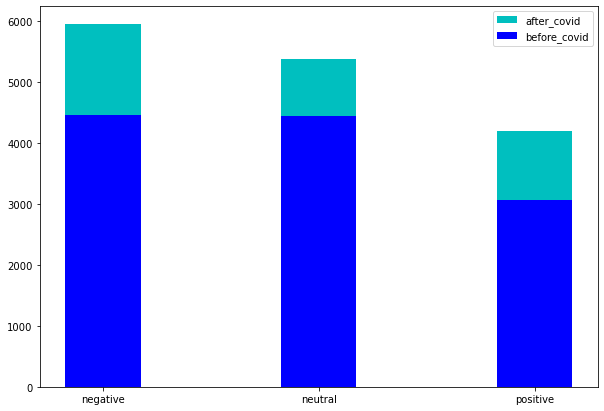

In [30]:
bar_width = 0.35
plt.subplots(figsize=(10, 7))
tick_label = ["negative", "neutral", "positive"]
x=df_after_covid['Sentiment']
y=df_after_covid['count']
x1=df_bar_before_covid['Sentiment']
y1=df_bar_before_covid['count']

plt.bar(x, y, bar_width, align="center", color="c", label="after_covid")
plt.bar(x, y1, bar_width, color="b", align="center", label="before_covid")

plt.legend()
plt.show()

In [31]:
data = df1.groupby(['new_date','Sentiment'])
df_line = data['Sentiment'].count()
df_line_g = df_line.reset_index(name='count')
df_line_g

new_date Sentiment  count
0     2019-05-01  negative     11
1     2019-05-01   neutral     21
2     2019-05-01  positive      8
3     2019-05-02  negative     12
4     2019-05-02   neutral     16
...          ...       ...    ...
2227  2021-05-12   neutral     12
2228  2021-05-12  positive     10
2229  2021-05-13  negative     16
2230  2021-05-13   neutral     10
2231  2021-05-13  positive      9

[2232 rows x 3 columns]

In [32]:
df_neg = df_line_g[df_line_g['Sentiment']=='negative']
df_neu = df_line_g[df_line_g['Sentiment']=='neutral']
df_pos = df_line_g[df_line_g['Sentiment']=='positive']

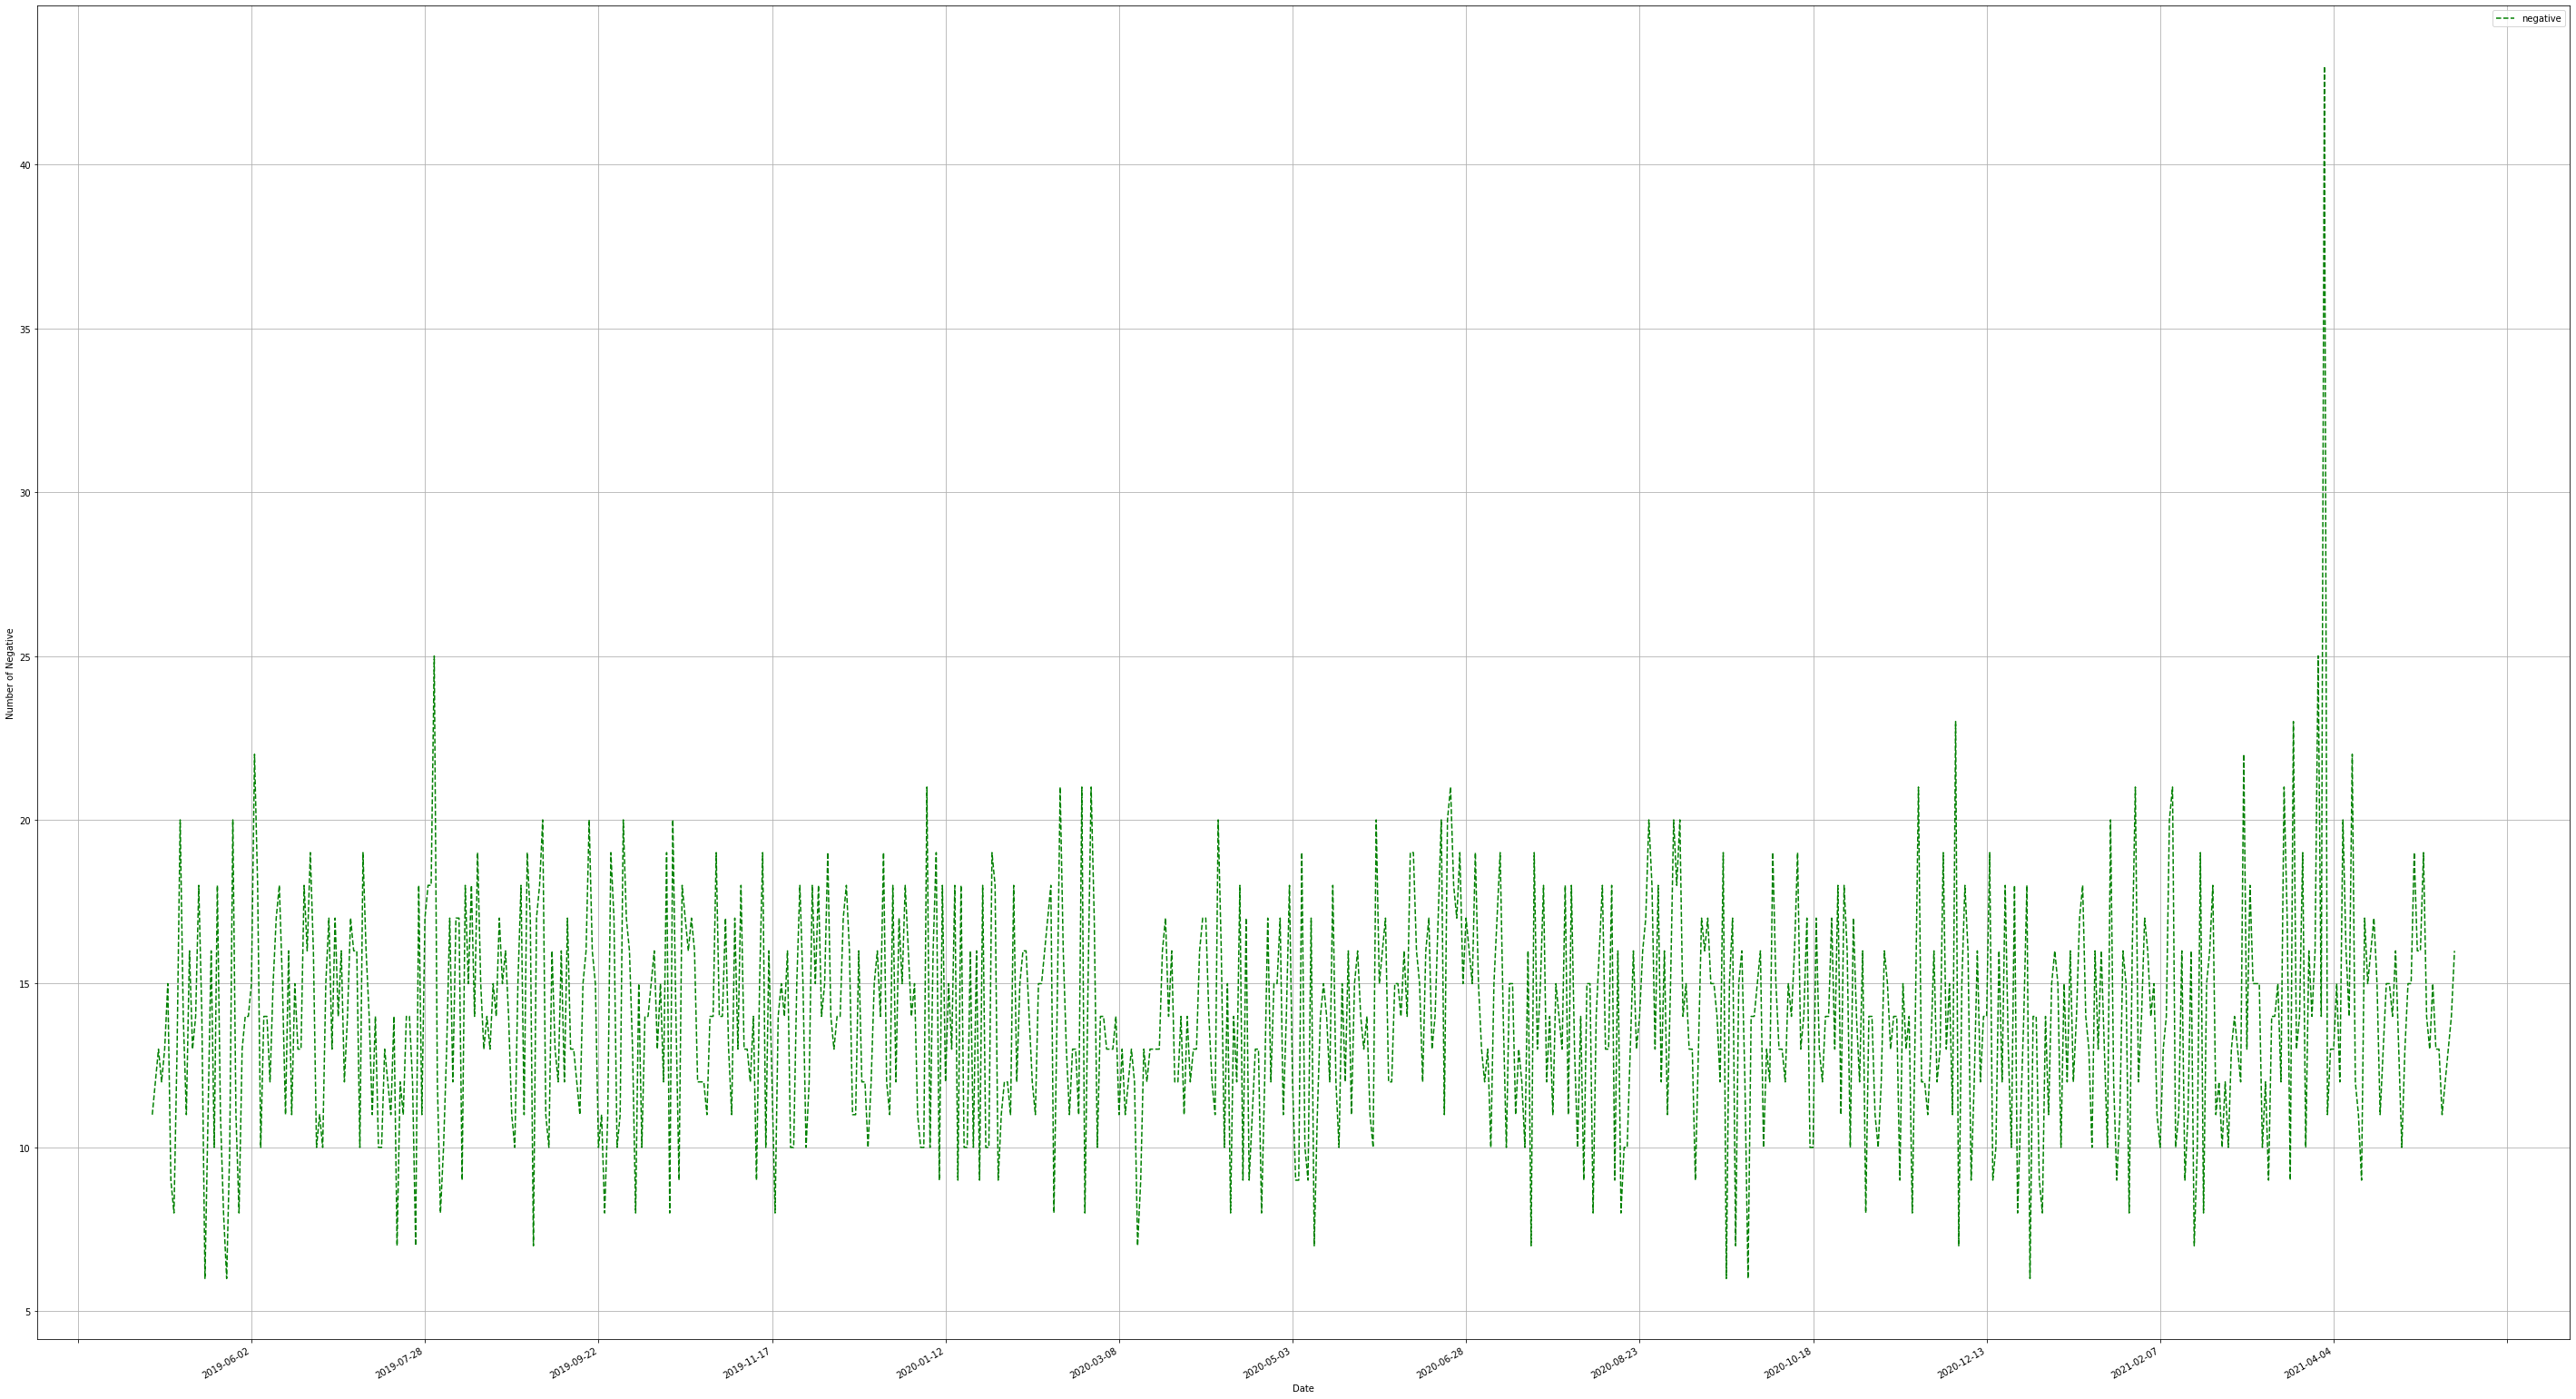

In [37]:
x=df_neg['new_date']
y1=df_neg['count']


fig, ax = plt.subplots(figsize=(50,30))
ax.plot_date(x, y1, fmt='g--',label='negative',color='g')

fig.autofmt_xdate()
    # For tickmarks and ticklabels every fourth week
ax.xaxis.set_major_locator(WeekdayLocator(byweekday=(0), interval=8))

plt.legend() 
plt.grid(True, which='both')
plt.xlabel('Date') 
plt.ylabel("Number of Negative") 
plt.show()
fig.savefig('./sentimen_negative.jpg')

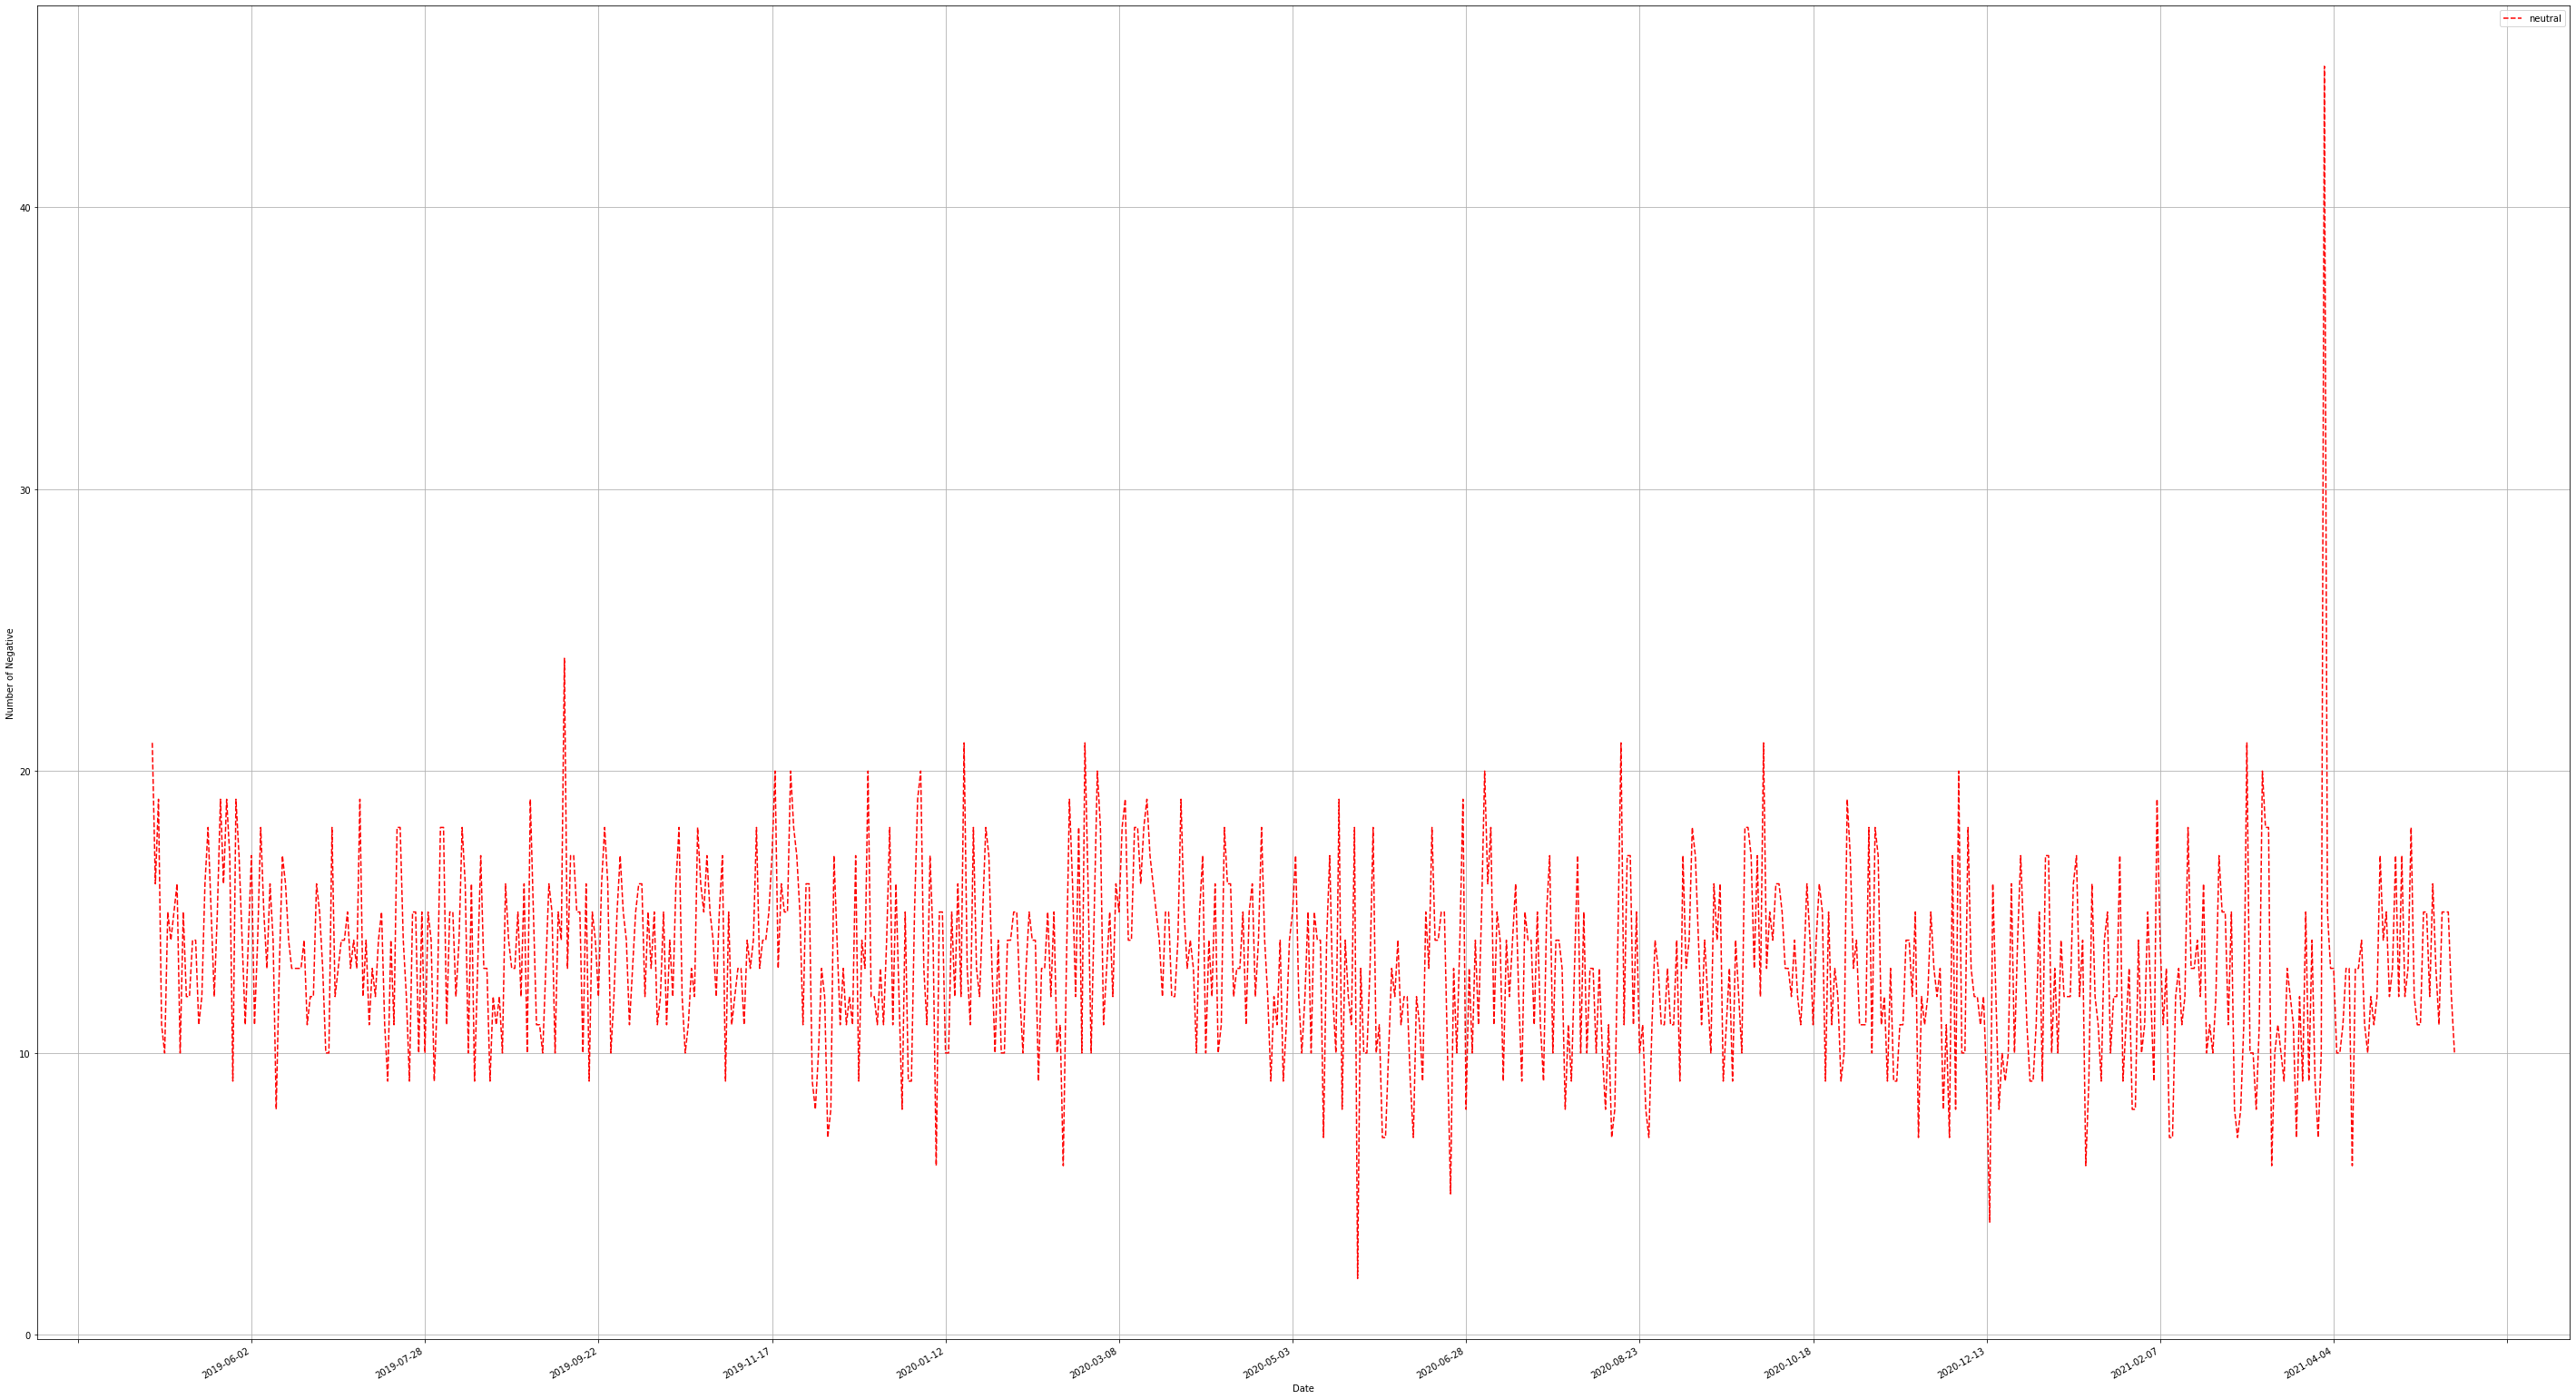

In [38]:
x=df_neg['new_date']
y2=df_neu['count']

fig, ax = plt.subplots(figsize=(50,30))

ax.plot_date(x, y2, fmt='g--',label='neutral',color='r') # x = array of dates, y = array of numbers  


fig.autofmt_xdate()
    # For tickmarks and ticklabels every fourth week
ax.xaxis.set_major_locator(WeekdayLocator(byweekday=(0), interval=8))

plt.legend() 
plt.grid(True, which='both')
plt.xlabel('Date') 
plt.ylabel("Number of Negative") 
plt.show()
fig.savefig('./sentimen_neutral.jpg')

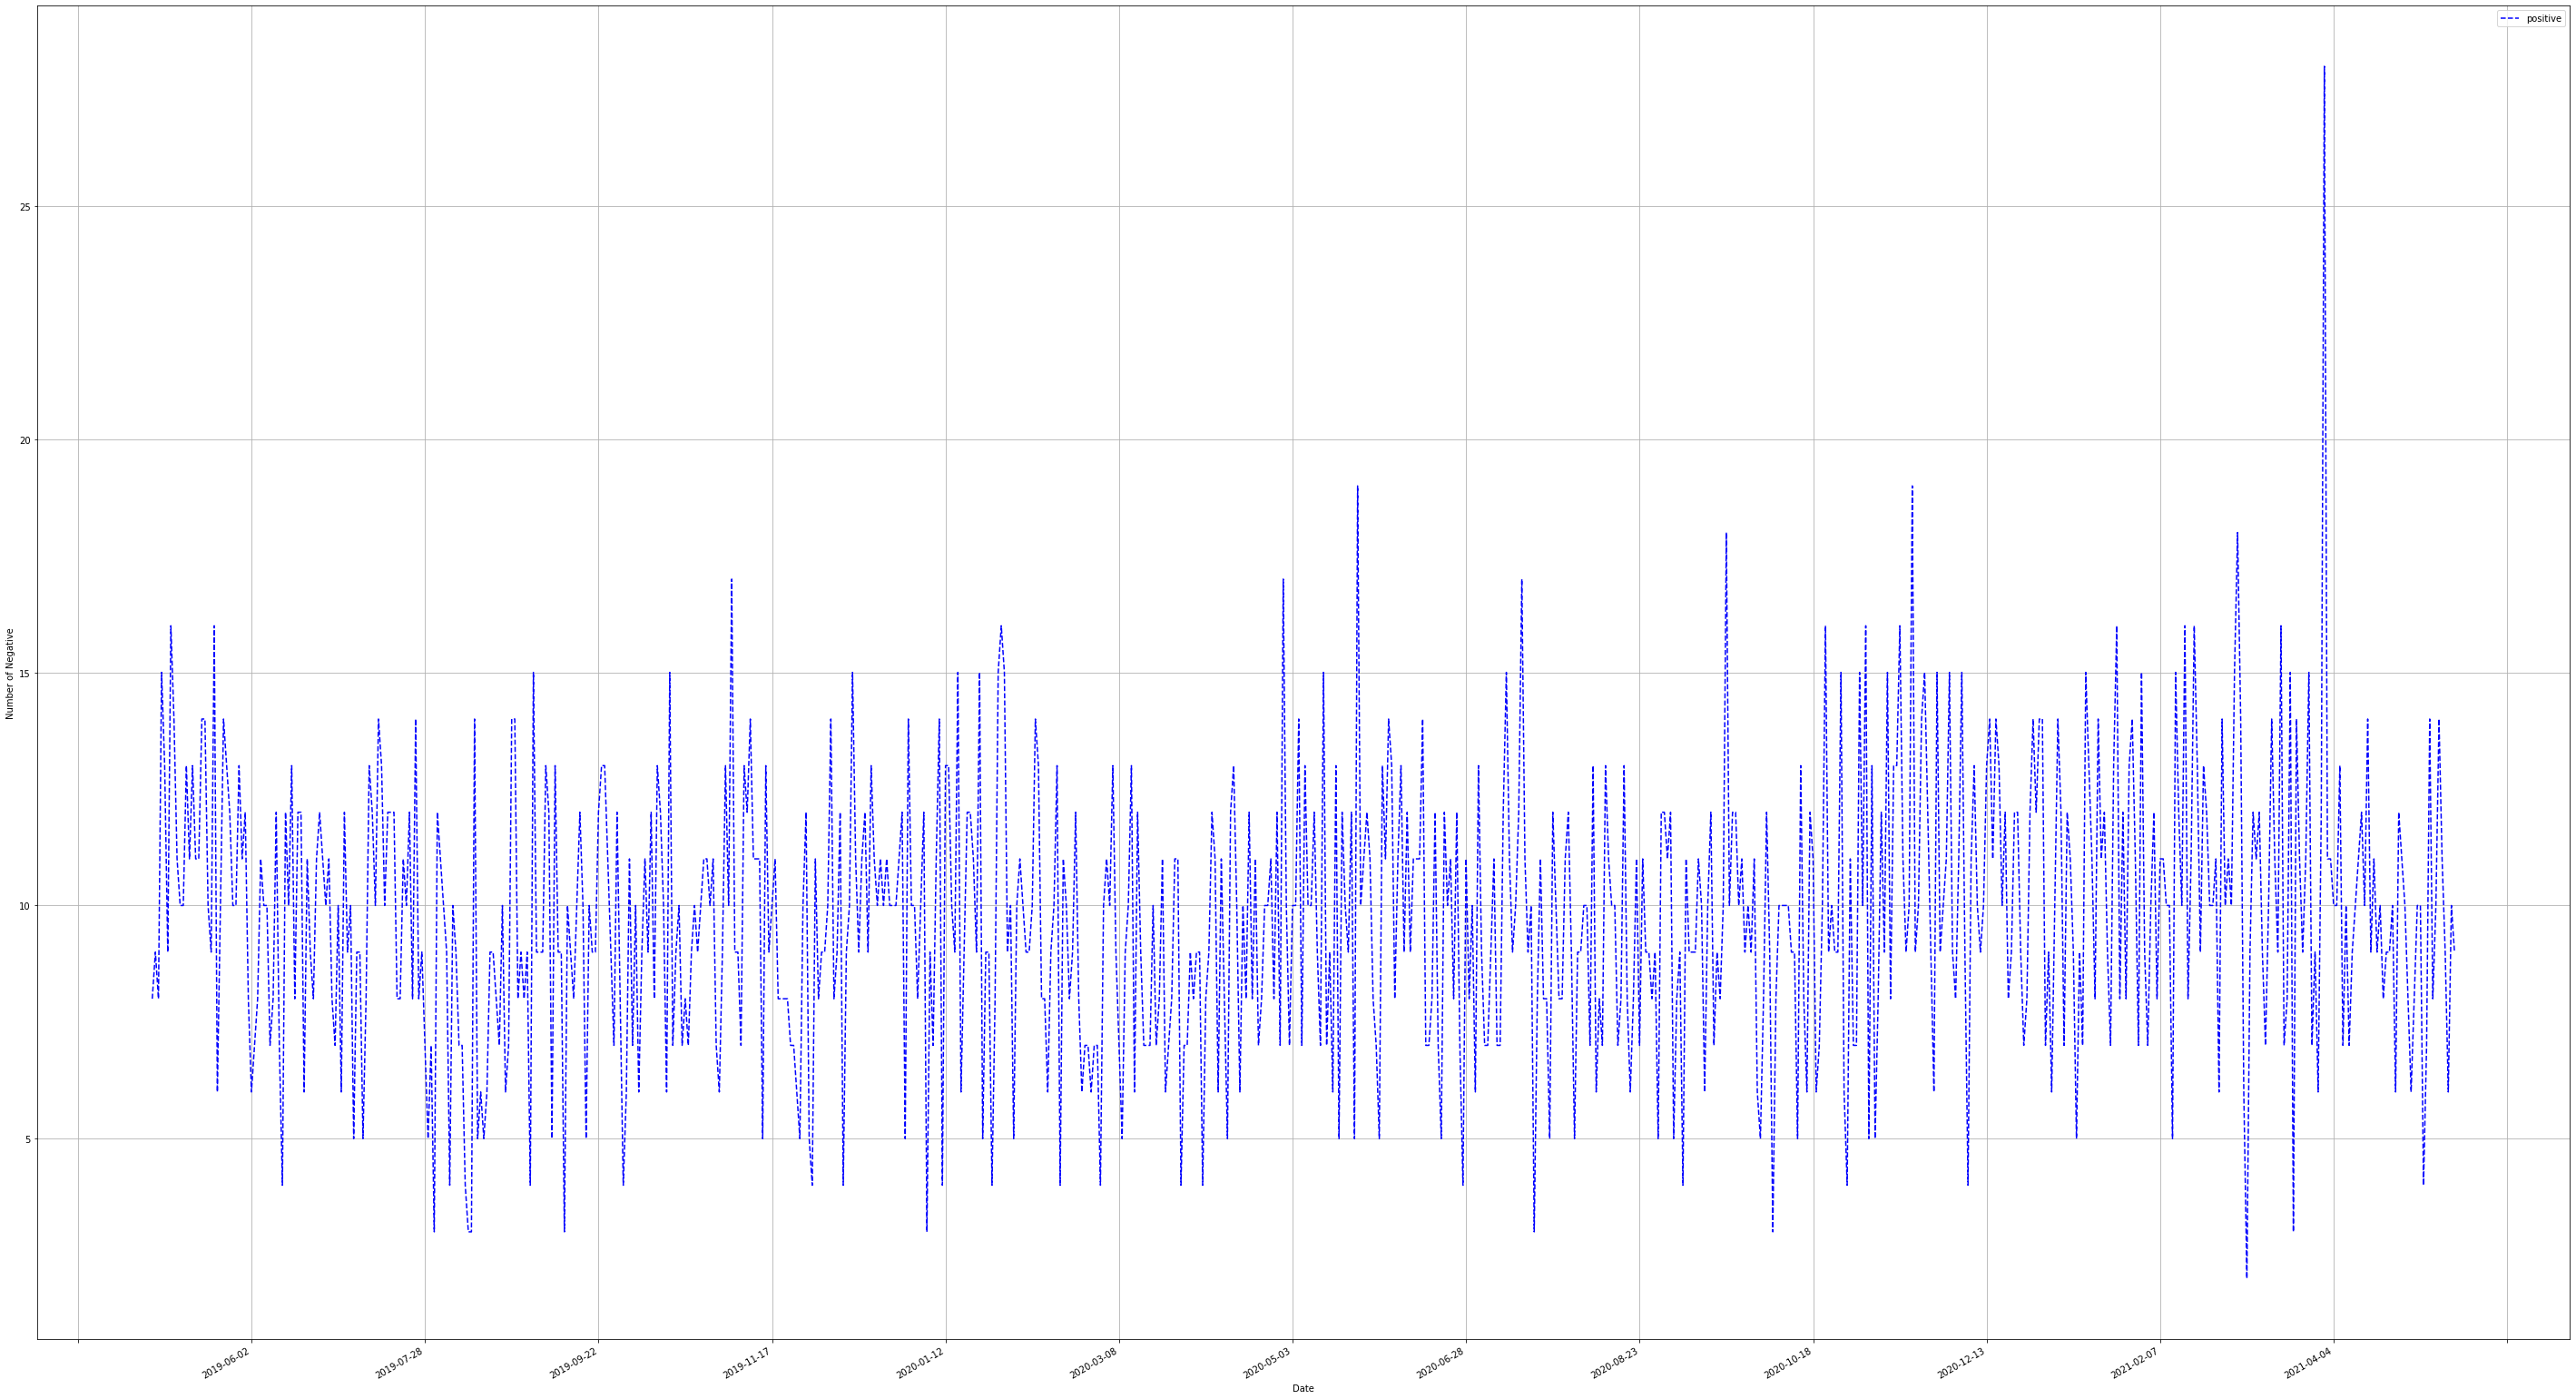

In [39]:
x=df_neg['new_date']
y3=df_pos['count']

fig, ax = plt.subplots(figsize=(50,30))
ax.plot_date(x, y3, fmt='g--',label='positive',color='b') # x = array of dates, y = array of numbers  

fig.autofmt_xdate()
    # For tickmarks and ticklabels every fourth week
ax.xaxis.set_major_locator(WeekdayLocator(byweekday=(0), interval=8))


plt.legend() 
plt.grid(True, which='both')
plt.xlabel('Date') 
plt.ylabel("Number of Negative") 
plt.show()
fig.savefig('./sentimen_positive.jpg')